<h1>Importing BeautifulSoup.</h1>
<p>We need to import BeautifulSoup to see DarkSky data.</p>

In [12]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

<h1>Define Function for Times.</h1>
<p>This function defines the scraping for the time that the low temperature and the time that the high temperature was recorded.</p>

In [13]:
def getTimes(y, x, someYear, someDay, someMonth):
    randomLocation="https://darksky.net/details/"+str(y)+','+str(x)+'/'+str(someYear)+'-'+str(someMonth)+'-'+str(someDay)+"/us10/en"
    html = urlopen(randomLocation)
    soup = BeautifulSoup(html, 'html')
    title = soup.title.text
    body = soup.body
    head = soup.head
    highTime = (soup.find(attrs={"class": "highLowTemp swip"}).find(attrs={"class":"highTemp swip"}).find(attrs={"class":"time"})).text.replace('˚', '')
    lowTime = (soup.find(attrs={"class": "highLowTemp swip"}).find(attrs={"class":"lowTemp swap"}).find(attrs={"class":"time"})).text.replace('˚', '')
    
    return highTime, lowTime

<h1>Define Function for Temps.</h1>
<p>This function requires the scraping for the high and low temperatures.</p>

In [14]:
def getTemps(y, x, someYear, someDay, someMonth):
    randomLocation="https://darksky.net/details/"+str(y)+','+str(x)+'/'+str(someYear)+'-'+str(someMonth)+'-'+str(someDay)+"/us12/en"
    html = urlopen(randomLocation)
    soup = BeautifulSoup(html, 'html')
    title = soup.title.text
    body = soup.body
    head = soup.head
    highTemp = (soup.find(attrs={"class": "highLowTemp swip"}).find(attrs={"class":"lowTemp swap"}).find(attrs={"class":"temp"})).text.replace('˚', '')
    lowTemp = (soup.find(attrs={"class": "highLowTemp swip"}).find(attrs={"class":"highTemp swip"}).find(attrs={"class":"temp"})).text.replace('˚', '')
    
    return highTemp, lowTemp

<h1>Define Function for Conditions.</h1>
<p>Using this function, we can determine the conditions that occurred.</p>

In [15]:
def getConditions(y, x, someYear, someDay, someMonth):    
    randomLocation="https://darksky.net/details/"+str(y)+','+str(x)+'/'+str(someYear)+'-'+str(someMonth)+'-'+str(someDay)+"/us12/en"
    html = urlopen(randomLocation)
    soup = BeautifulSoup(html, 'html')
    title = soup.title.text
    body = soup.body
    head = soup.head
    conditionStatement = soup.find(id= "summary").text.replace('˚', '')
    
    return conditionStatement

<h1>Convert Military Time to Regular Time</h1>
<p>This is a terrible function (very inefficient) that converts Military Time (as provided by DarkSky to Normal Time.</p>

In [10]:
def removeColonAndFormatCorrectly(x1, x2):
    x1_pm = 0
    x2_pm = 0
    
    x1_list = x1.split(':', 2)
    x2_list = x2.split(':', 2)
    
    x1_list = [int(i) for i in x1_list]
    x2_list = [int(i) for i in x2_list]
    
    if(x1_list[0] > 12):
        x1_list[0] = x1_list[0] - 12
        x1_pm = 1
    
    if(x2_list[0] > 12):
        x2_list[0] = x2_list[0] - 12
        x2_pm = 1
    
    x1_list = [str(x) for x in x1_list]
    x2_list = [str(x) for x in x2_list]
    
    x1_list.insert(1, ':')
    x2_list.insert(1, ':')
    
    x1_final = ' '.join(x1_list)
    x2_final = ' '.join(x2_list)

    x1_final = x1_final.replace(' ', '')
    x2_final = x2_final.replace(' ', '')
    
    if(x1_pm == 1):
        x1_final = x1_final + ' PM'
    else:
        x1_final = x1_final + ' AM'
    
    if(x2_pm == 1):
        x2_final = x2_final + ' PM'
    else:
        x2_final = x2_final + ' AM'
    
    return x1_final, x2_final

<h1>Execute and Print Function</h1>
<p>This prints out the scraped data in a pretty way.</p>

In [16]:
high, low = getTimes(35.19266, -113.5254, 2022, 1, 4)
highT, lowT = getTemps(35.19266, -113.5254, 2022, 1, 4)
list1, list2 = removeColonAndFormatCorrectly(high, low)
weatherCondition = getConditions(35.19266, -113.5254, 2022, 1, 4)

In [17]:
print('The Lowest Temperature, which was ' + str(lowT) + ' °F,' + ' was recorded at', list1 + '.')
print('The Highest Temperature, which was ' + str(highT) + ' °F,' + '  was recorded at', list2 + '.')
print('Condition: ' + weatherCondition)

The Lowest Temperature, which was 44 °F, was recorded at 5:29 AM.
The Highest Temperature, which was 71 °F,  was recorded at 3:50 PM.
Condition: Clear throughout the day.


<h1>Make a Pretty Graph w/ MatPlotLib!</h1>
<p>Now, we will add a label at each point which indicates the time it reached high and the temp. it was at.</p>

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
from jupyterthemes import jtplot
jtplot.style()

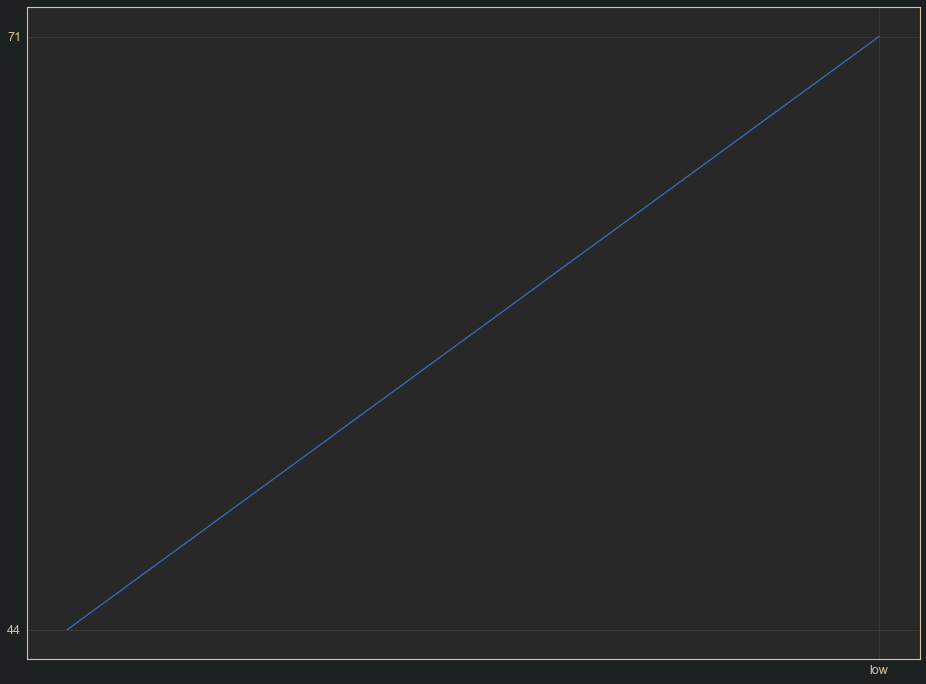

In [30]:
fig, ax = plt.subplots(figsize=(16, 12))
ticks = [1, 2]
x_ticks_labels = ['low', 'high']
y = [lowT, highT]

plt.xticks(ticks, x_ticks_labels)
plt.plot(y)
plt.show()